<a href="https://colab.research.google.com/github/dayserivera/Activities-Pose-Estimation/blob/master/TCC_motif_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install stumpy
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 4.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from sklearn import preprocessing
from scipy.signal import find_peaks

In [4]:
#Pesquisar para o que isso é usado
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [5]:
poli_df = pd.read_csv("/content/entry_points.txt.csv")


keypoint = "LEFT_ELBOW"

poli_df[keypoint + "_Y"] = pd.to_numeric(poli_df[keypoint + "_Y"])
poli_df[keypoint + "_X"] = pd.to_numeric(poli_df[keypoint + "_X"])
poli_df[keypoint + "_X_Y"] = poli_df[keypoint + "_Y"] * poli_df[keypoint + "_X"]
poli_df = poli_df[[keypoint + '_X_Y']].copy()

In [6]:
poli_df.head()

,LEFT_ELBOW_X_Y
0,414794.959557
1,423244.668404
2,422806.715191
3,427059.911076
4,434482.079530


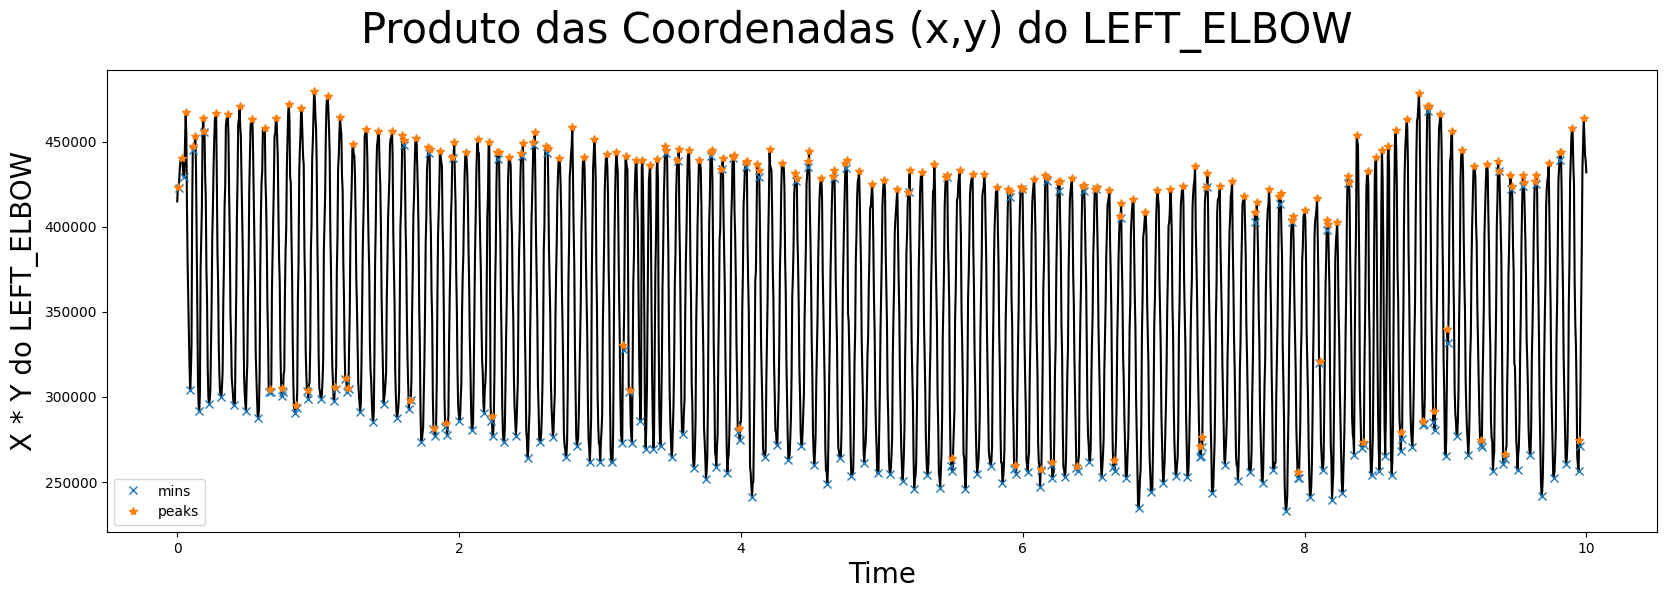

In [16]:
series = poli_df[keypoint + '_X_Y']
peaks, _ = find_peaks(series)
mins, _ =find_peaks(series*-1)
x = np.linspace(0, 10, len(series))

plt.suptitle('Produto das Coordenadas (x,y) do ' + keypoint, fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('X * Y do ' + keypoint , fontsize='20')

plt.plot(x, series, color='black');
plt.plot(x[mins], series[mins], 'x', label='mins')
plt.plot(x[peaks], series[peaks], '*', label='peaks')
plt.legend()

In [8]:
#Contando os mínimos da série original
mins.size

195

In [9]:
peaks.size

196

In [10]:
query_df = pd.read_csv("/content/query_entrypoints.txt.csv")

query_df[keypoint + "_Y"] = pd.to_numeric(query_df[keypoint + "_Y"])
query_df[keypoint + "_X"] = pd.to_numeric(query_df[keypoint + "_X"])
query_df[keypoint + "_X_Y"] = query_df[keypoint + "_X"] * query_df[keypoint + "_Y"]
query_df = query_df[[keypoint + '_X_Y']].copy()
query_df.head()

,LEFT_ELBOW_X_Y
0,414254.325177
1,423789.881011
2,437506.413400
3,438995.183309
4,432336.618947


In [11]:
#Executo a query de um polichileno na série de polichinelos
distance_profile = stumpy.mass(query_df[keypoint + "_X_Y"], poli_df[keypoint + '_X_Y'])

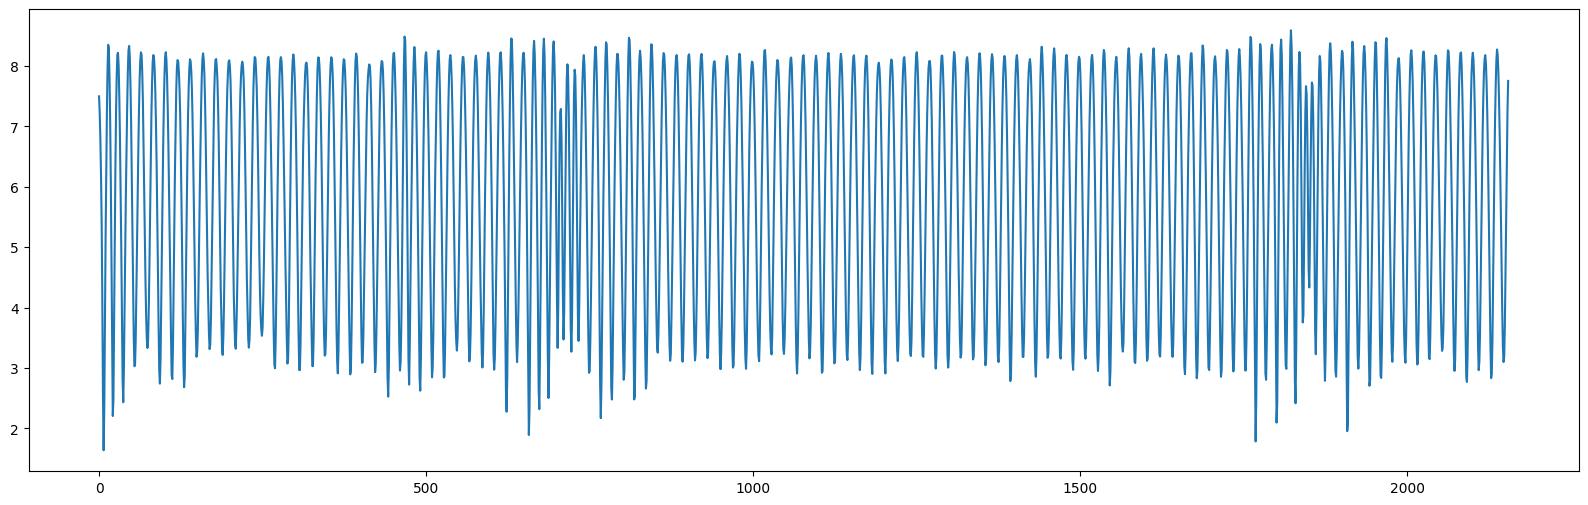

In [12]:
plt.plot(distance_profile)
plt.show()

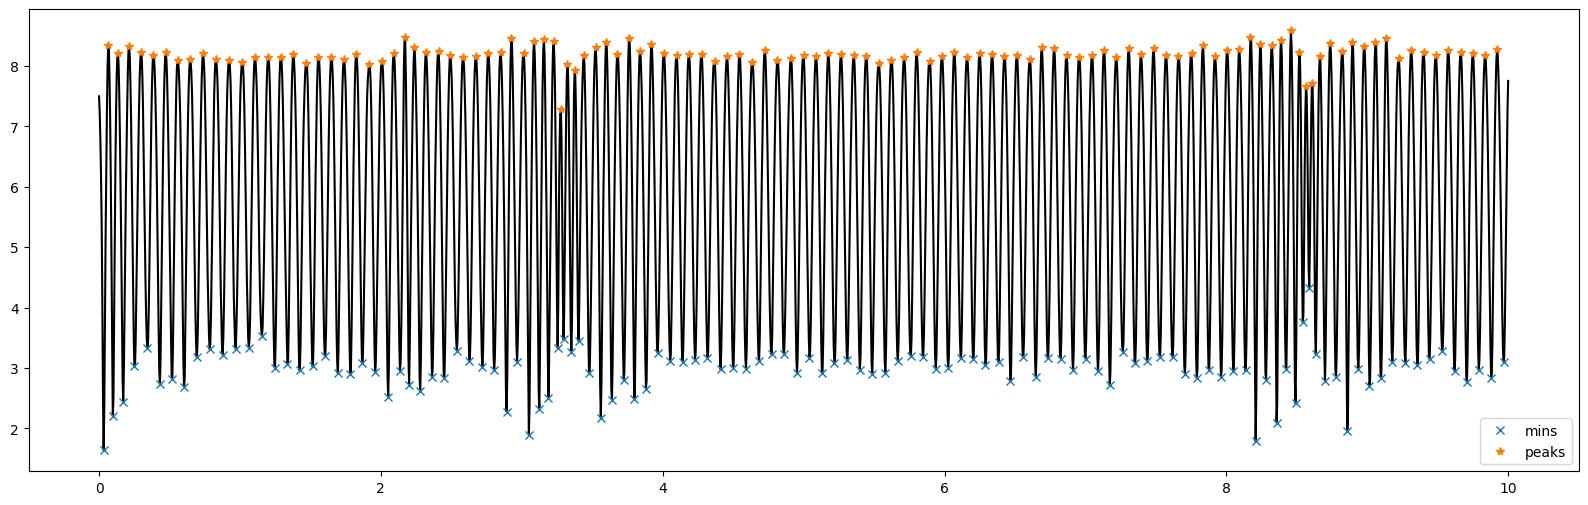

In [13]:
series = distance_profile
peaks, _ = find_peaks(series)
mins, _ =find_peaks(series*-1)
x = np.linspace(0, 10, len(series))
plt.plot(x, series, color='black');
plt.plot(x[mins], series[mins], 'x', label='mins')
plt.plot(x[peaks], series[peaks], '*', label='peaks')
plt.legend()

In [14]:
#Os mínimos batem com a quantidade de polichinelos executada de 120 polichinelos
mins.size

120

NOVOS TESTES COM OUTRAS FUNÇÕES DO STUMPY